In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_MEGNet_5folds = pd.read_csv('../Data/train_oof_0811.csv')

In [36]:
train_MEGNet_5folds.head()

,id,type,scalar_coupling_constant,gnn_0731,gnn_0802,edge_0802,lgb_0729,lgb_0730,lgb_0803,edge_0804,edge_0806,edge_0729,edge_0730,edge_0807,edge_0808,edge_0729_100epoch,edge_0730_100epoch,edge_0811
0,0,1JHC,84.8076,85.204422,84.400238,85.675613,88.422145,85.382194,87.112568,83.678360,82.317467,85.372574,85.063919,84.407608,85.171486,87.437523,82.608986,84.599823
1,1,2JHH,-11.2570,-13.812207,-11.299141,-11.053956,-9.749846,-10.332708,-10.113198,-10.820622,-10.903958,-11.311406,-10.666061,-10.935337,-11.093320,-10.060014,-10.340228,-11.453266
2,2,2JHH,-11.2548,-13.811005,-11.297125,-11.050260,-9.749846,-10.328166,-10.072891,-10.817541,-10.900917,-11.308751,-10.662839,-10.932543,-11.089307,-10.056600,-10.336302,-11.450315
3,3,2JHH,-11.2543,-13.811016,-11.297044,-11.049506,-9.717249,-10.328166,-10.112966,-10.816497,-10.899994,-11.308143,-10.661937,-10.931656,-11.088044,-10.055735,-10.335059,-11.449178
4,4,1JHC,84.8074,85.205597,84.400703,85.687164,88.407545,85.409495,87.115604,83.693085,82.324753,85.379402,85.066933,84.422340,85.175209,87.447685,82.625580,84.607445


In [35]:
del train_MEGNet_5folds['molecule_name']

In [37]:
train = pd.read_csv('../Data/train.csv')
#test = pd.read_csv('../Data/test.csv')

In [38]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [39]:
assert np.all(train.id==train_MEGNet_5folds.id)

In [40]:
train = pd.concat([train,train_MEGNet_5folds.iloc[:,3:]],1)

In [41]:
model_list = ['gnn_0731', 'gnn_0802', 'edge_0802', 'lgb_0729', 'lgb_0730', 'lgb_0803',
       'edge_0804', 'edge_0806', 'edge_0729', 'edge_0730',
       'edge_0807', 'edge_0808', 'edge_0729_100epoch', 'edge_0730_100epoch',
       'edge_0811']

In [42]:
model_list_error = [i+'_err' for i in model_list]

In [43]:
errs = pd.DataFrame(np.abs(train.loc[:,model_list].values - train.scalar_coupling_constant.values[:,np.newaxis]),
                   columns=model_list_error)

In [44]:
train = pd.concat([train,errs],1)

In [7]:
#train = train.iloc[:,[0,1,2,3,4,5,7,8]]

In [9]:
# cv-score
#np.mean(np.log(train.groupby(['type'])['abs_error'].mean().values))

-1.8122469406902406

In [45]:
train['count'] = train.groupby(['molecule_name'])['id'].transform('count')

In [46]:
error_type_count = train.groupby(['type','count'])[model_list_error].mean().unstack()

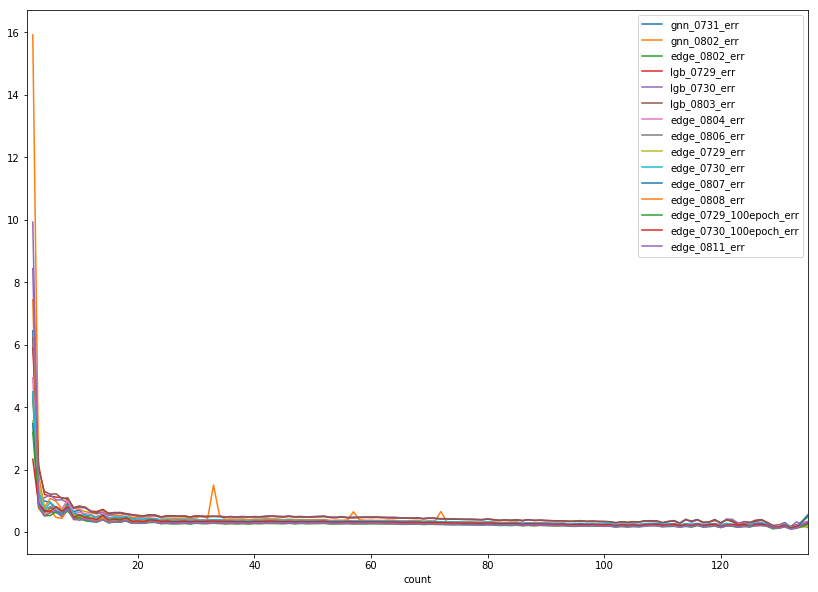

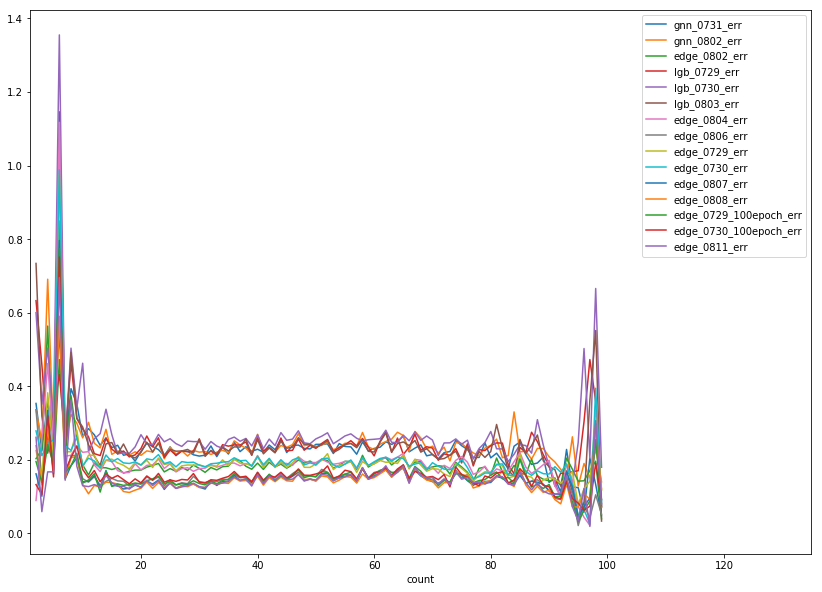

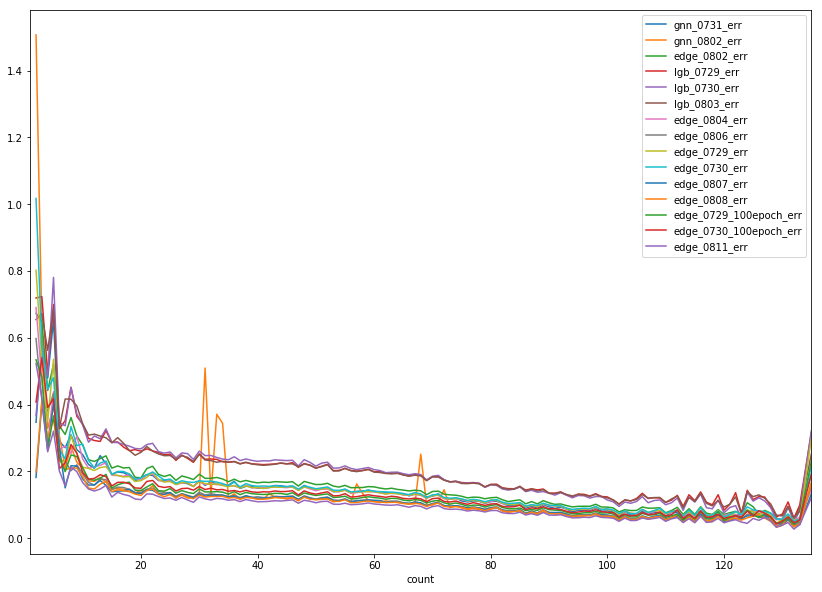

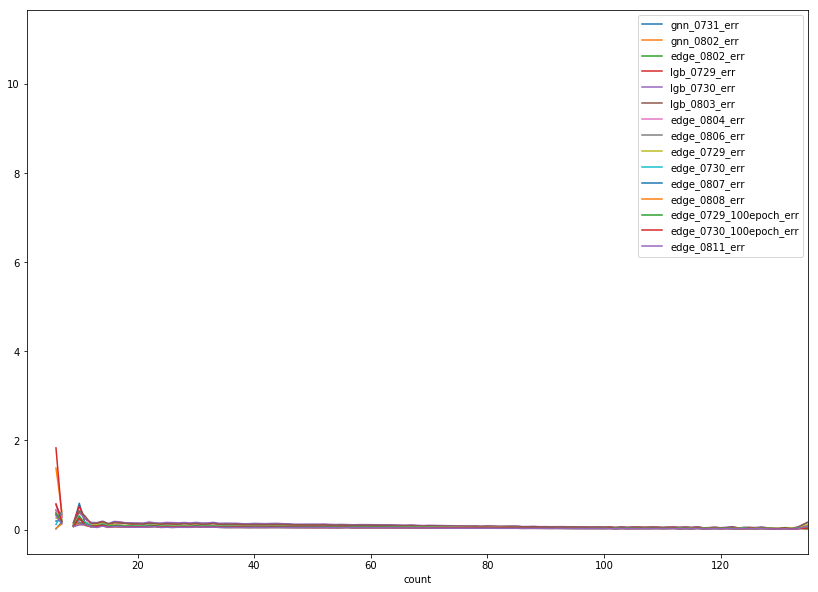

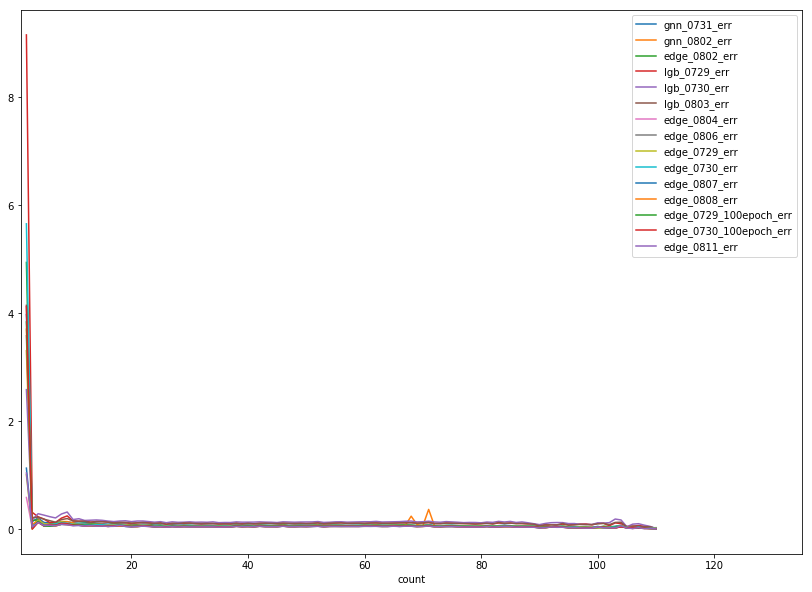

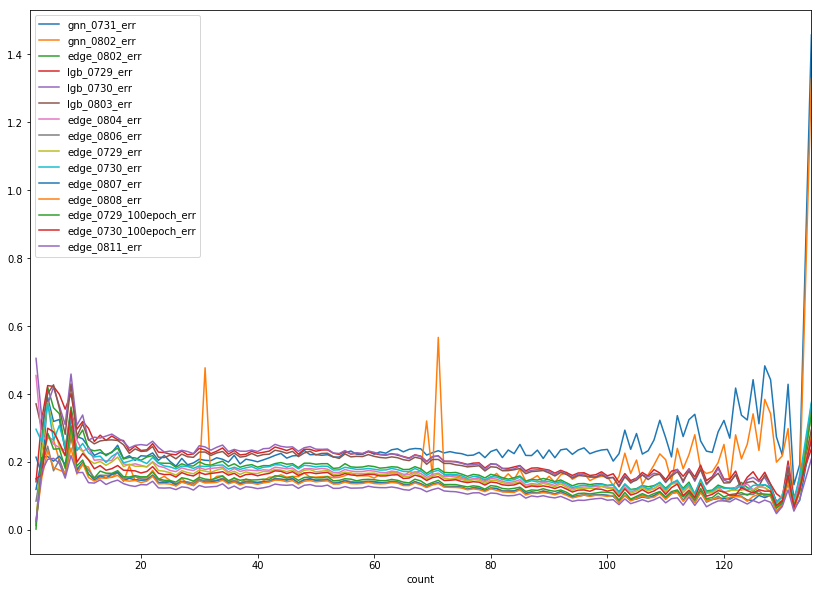

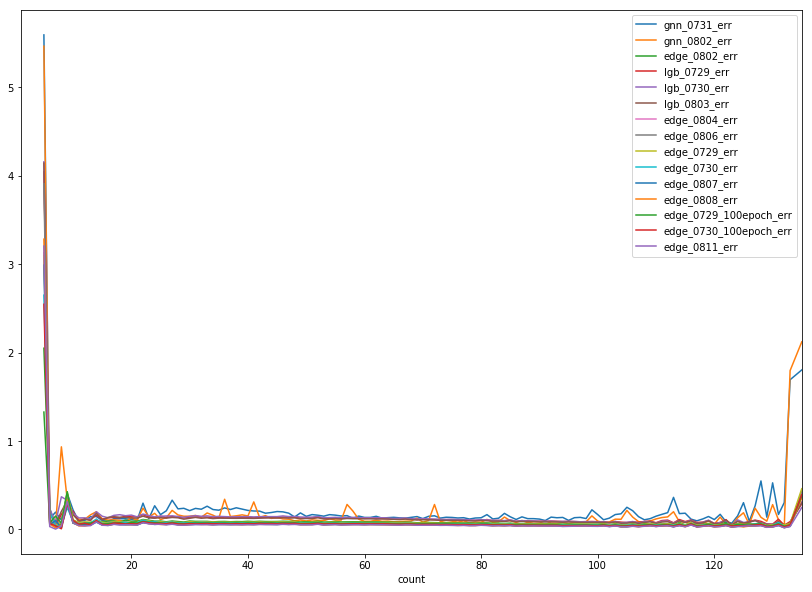

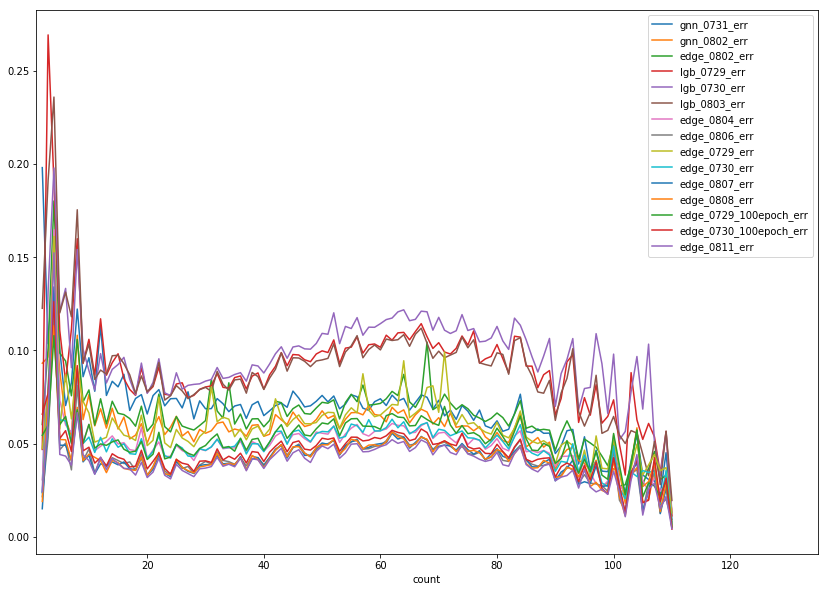

In [58]:
for i in range(8):
    error_type_count.iloc[i].unstack().T.plot(figsize=(14,10))
    plt.show()

In [31]:
error_type_count = train.groupby(['type','count'])[model_list_error].mean().unstack()
error_type_count_num = train.groupby(['type','count'])['abs_error'].count().unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c06eef5f8>,
      dtype=object)

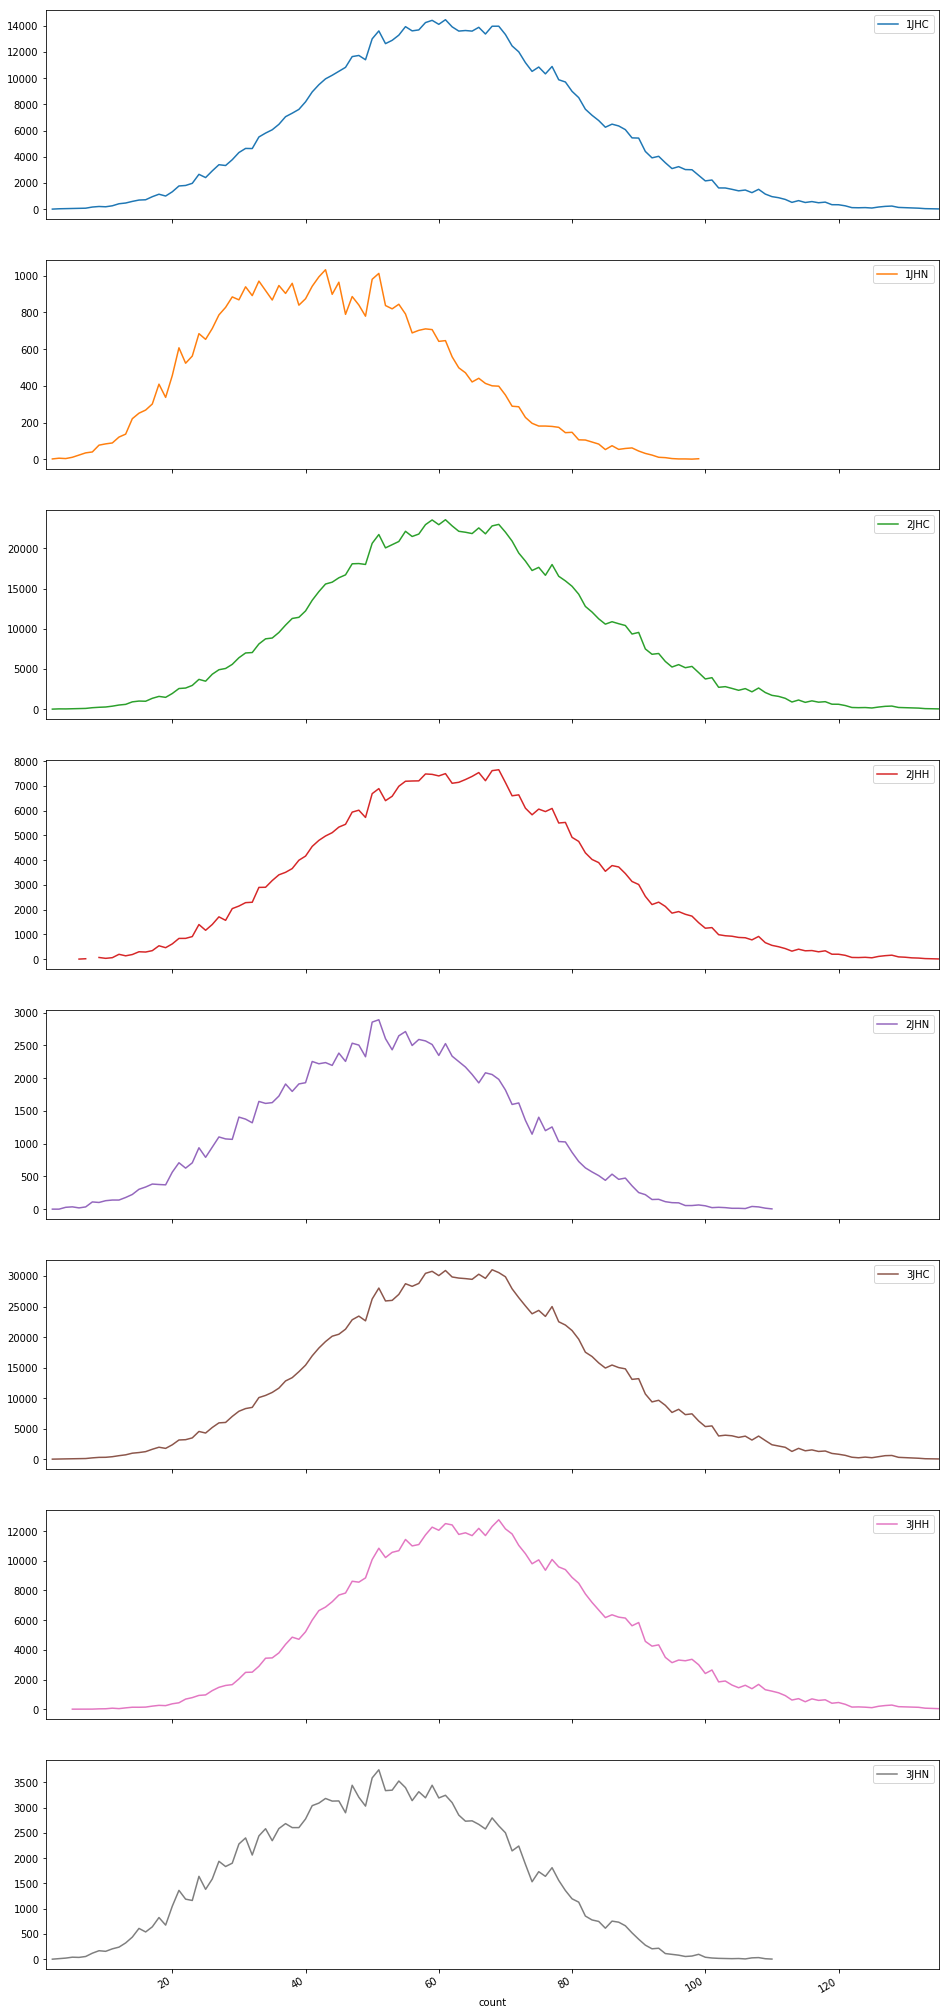

In [42]:
error_type_count_num.T.plot(subplots=True,figsize=(16,40))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c0c278e80>,
      dtype=object)

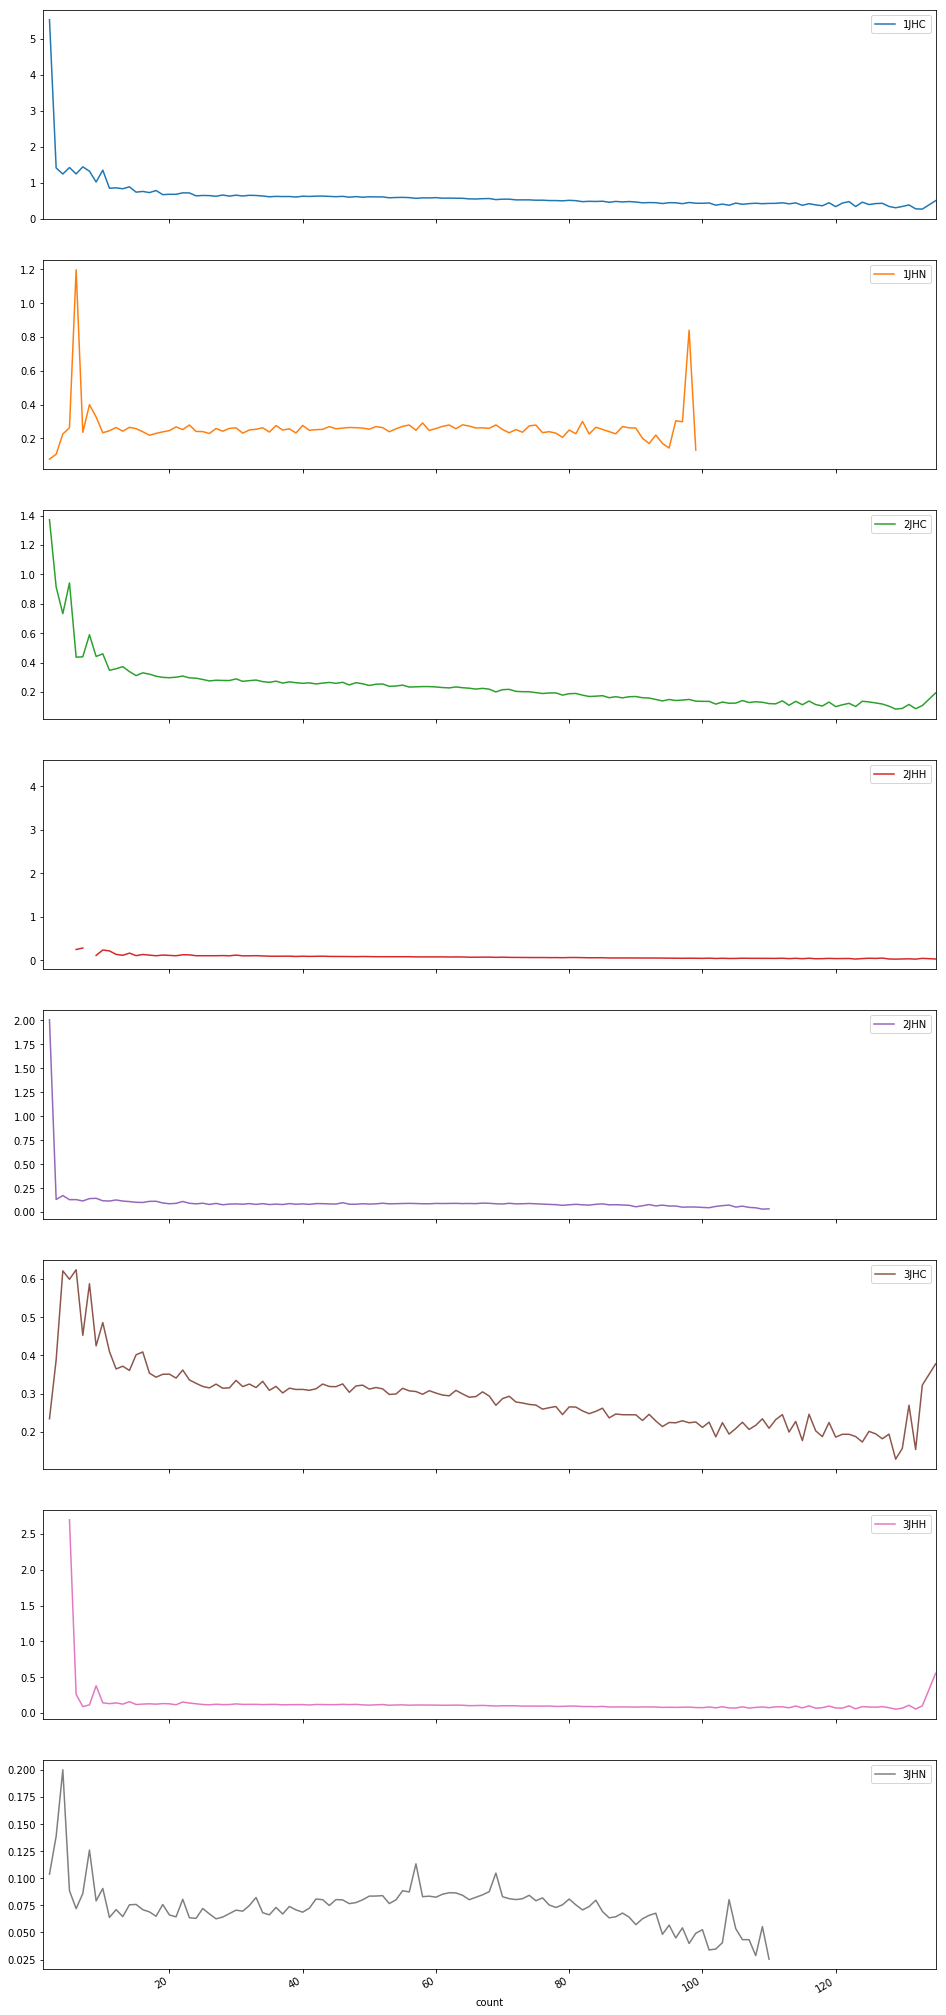

In [39]:
error_type_count.T.plot(subplots=True,figsize=(16,40))

In [44]:
test['count'] = test.groupby(['molecule_name'])['id'].transform('count')

In [46]:
error_type_count_num_test = test.groupby(['type','count'])['id'].count().unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c11991780>,
      dtype=object)

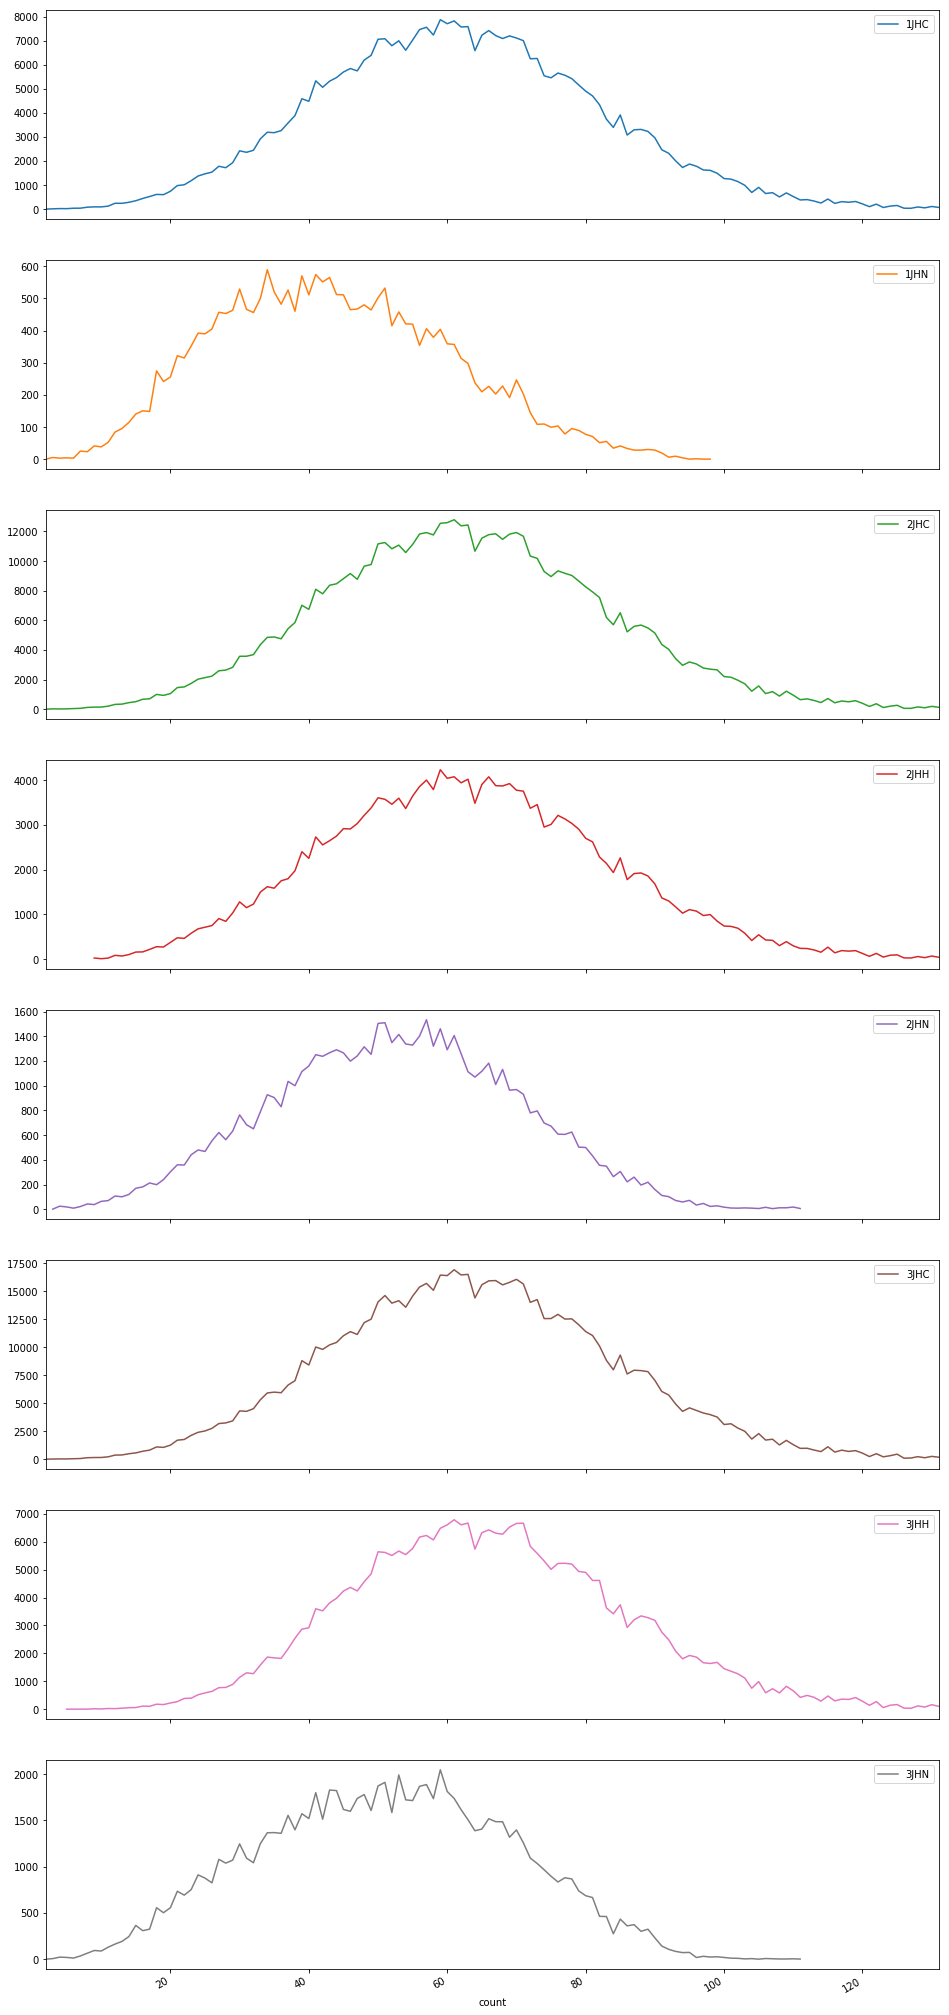

In [47]:
error_type_count_num_test.T.plot(subplots=True,figsize=(16,40))

In [52]:
count_atom = train.groupby(['molecule_name']).apply(lambda x:len(set(x.atom_index_0)|set(x.atom_index_1)))

In [55]:
train['count_atom'] = train.molecule_name.map(count_atom.to_dict())

In [57]:
error_type_count = train.groupby(['type','count_atom'])['abs_error'].mean().unstack()
error_type_count_num = train.groupby(['type','count_atom'])['abs_error'].count().unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c112790f0>,
      dtype=object)

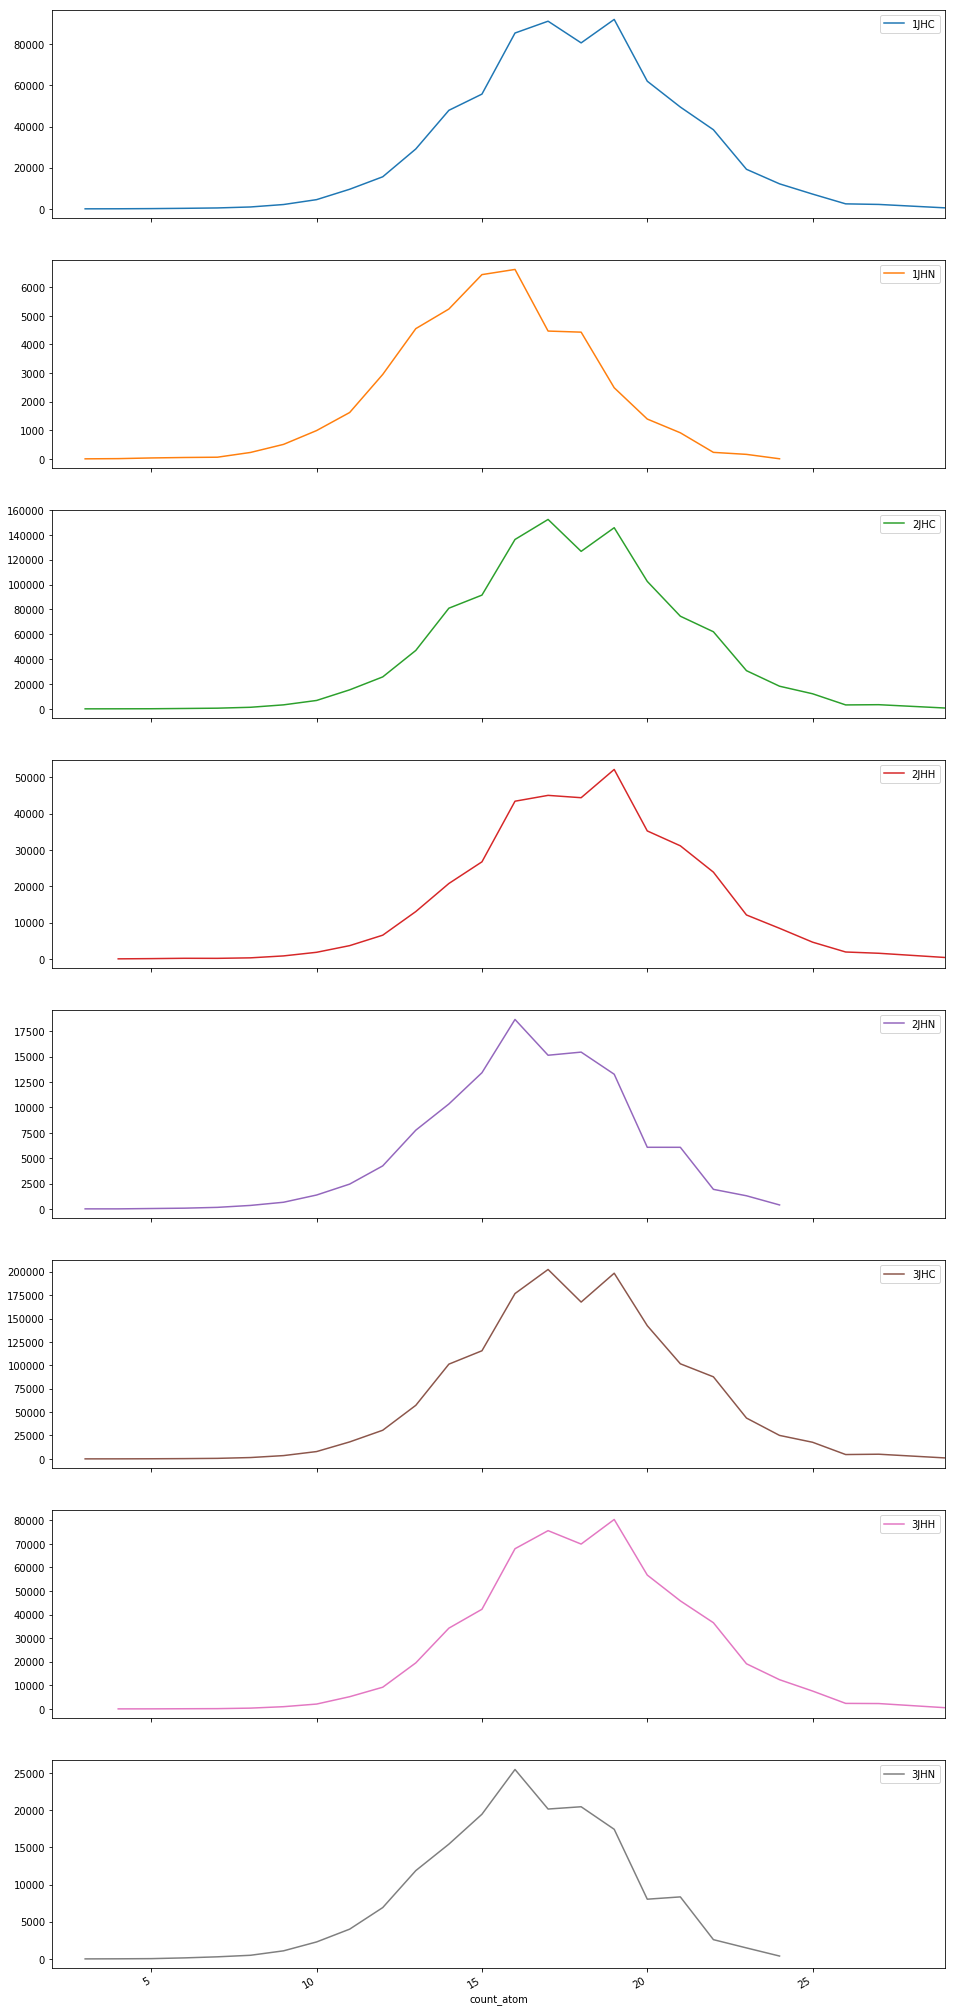

In [58]:
error_type_count_num.T.plot(subplots=True,figsize=(16,40))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c11115cf8>,
      dtype=object)

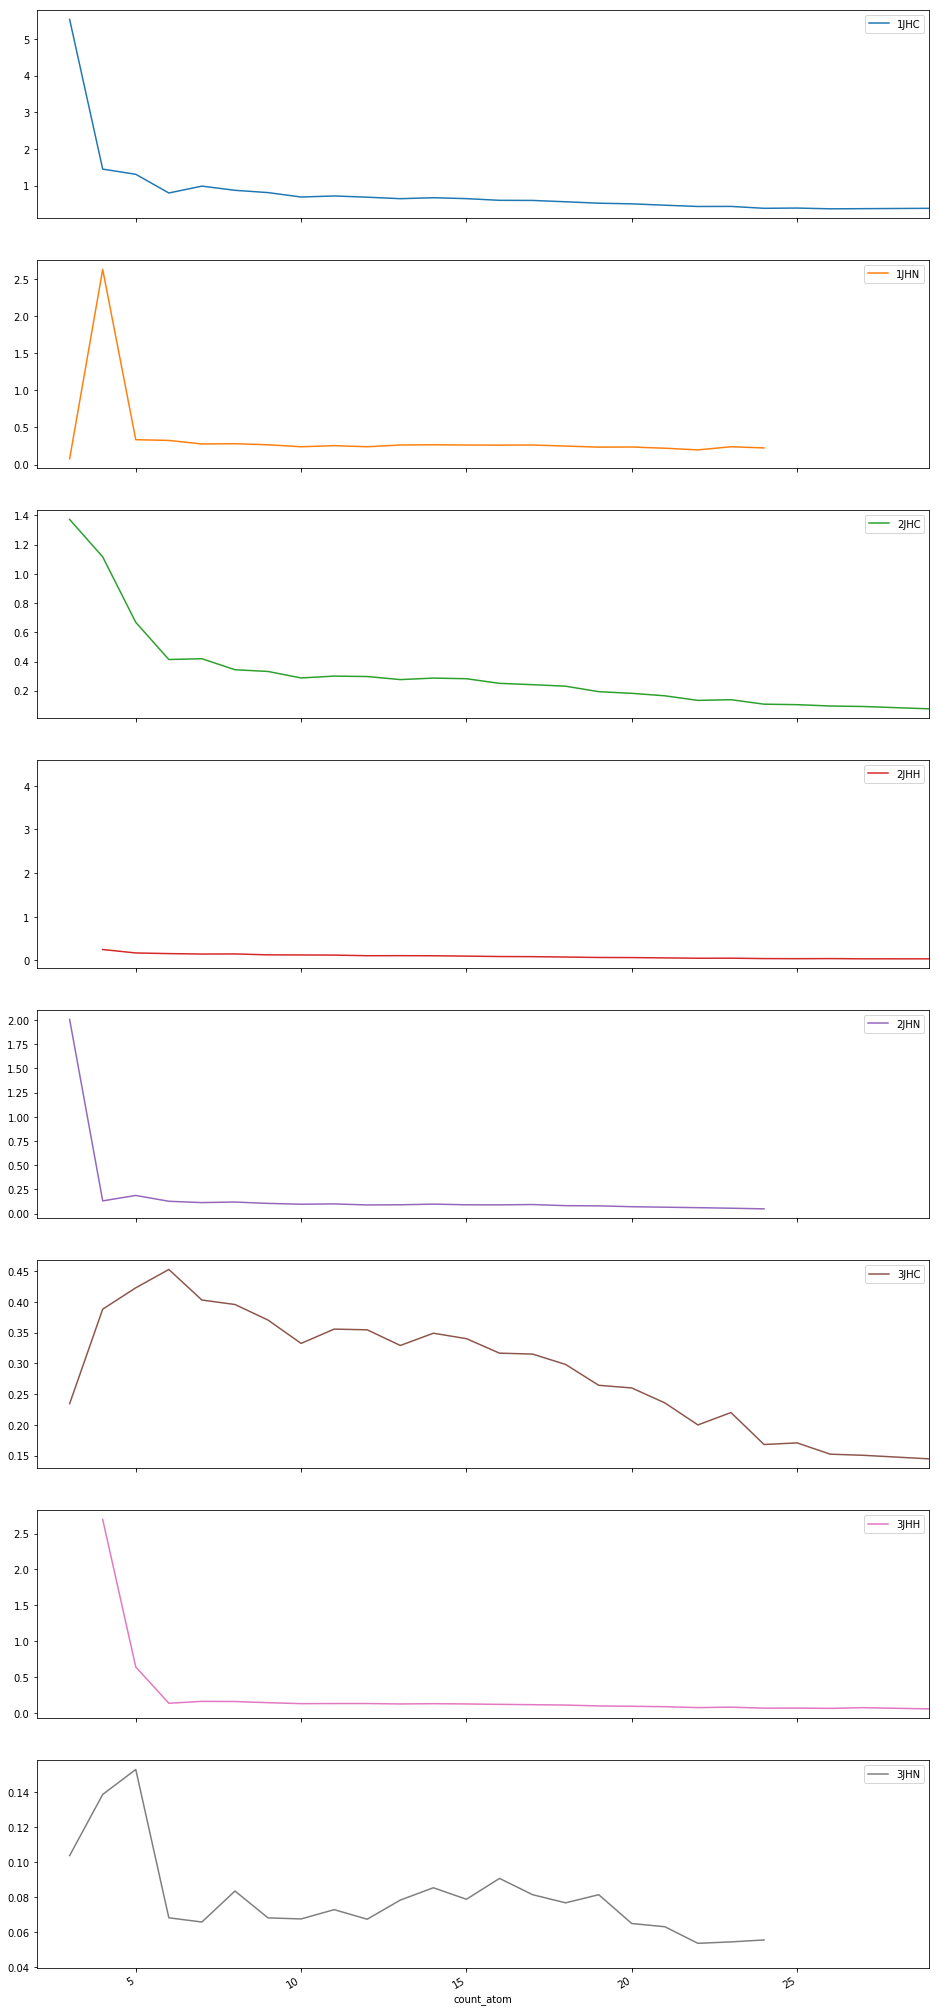

In [59]:
error_type_count.T.plot(subplots=True,figsize=(16,40))